In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import seaborn as sns

pd.options.display.float_format = '{:.5f}'.format # Suprimo notación científica

datos = pd.read_csv("../Entrenamieto_ECI_2020.csv")

datos.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.00000,EUR,5272800.00000,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.00000,EUR,48230.00000,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.60000,USD,83865.60000,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.50000,USD,7421881.50000,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.50000,USD,13357192.50000,Closed Lost,Prod_Category_A_None


## Cantidad por país, Facturación por país, promedio por facturación


### Cantidad de oportunidades por país

In [2]:
# Territory: territorio comercial de la oportunidad (Categórica).
# Hay 4999 None
datos['Territory'].value_counts()

None               4999
Germany            1682
NW America         1568
Australia          1208
India               809
                   ... 
Slovenia              1
Monaco                1
Burma                 1
Georgia               1
Solomon Islands       1
Name: Territory, Length: 76, dtype: int64

In [3]:
# Cambio None por NaN y los filtro
territory_filtered = datos['Territory'].replace(to_replace=['None'], value=np.nan).dropna()
territory_filtered.value_counts()

Germany            1682
NW America         1568
Australia          1208
India               809
NE America          760
                   ... 
Monaco                1
Burma                 1
Croatia               1
Solomon Islands       1
Georgia               1
Name: Territory, Length: 75, dtype: int64

Text(0.5, 0, 'País')

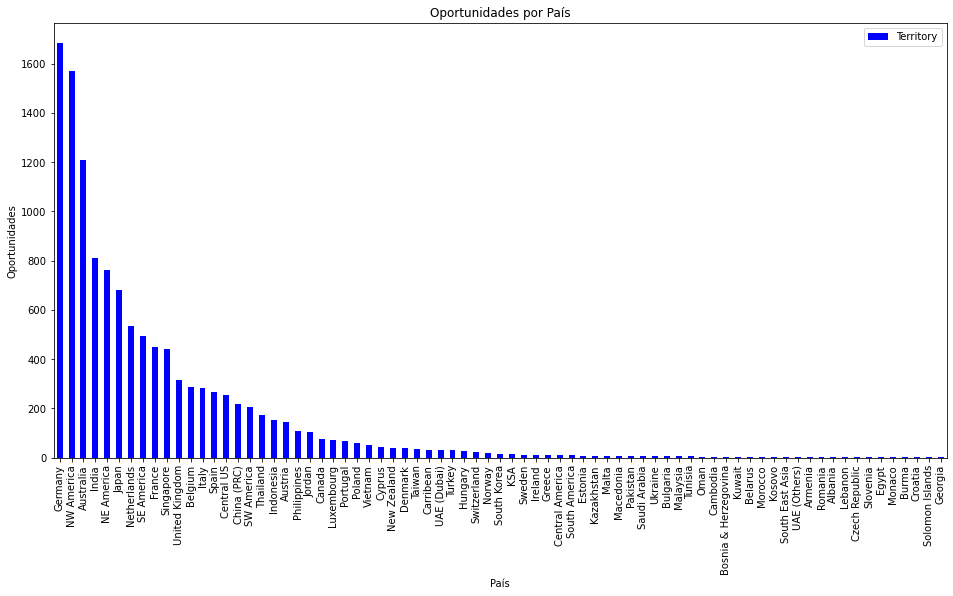

In [4]:
territory_filtered_df = territory_filtered.value_counts().to_frame()
territory_filtered_df.plot(kind='bar', figsize=(16, 8), title='Oportunidades por País', color='blue')

ax = plt.gca()
ax.set_ylabel('Oportunidades')
ax.set_xlabel('País')

Text(0.5, 0, 'País')

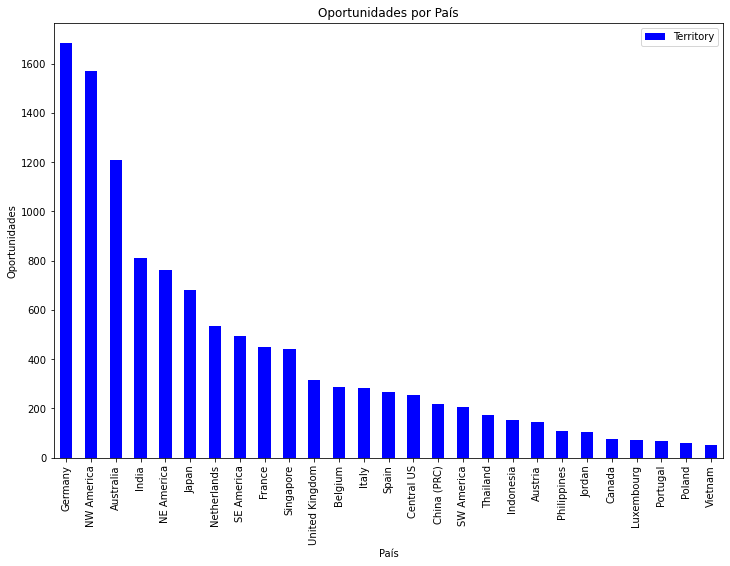

In [5]:
# Podemos filtrar por los que tienen al menos 50 oportunidades para analizar mejor
territory_mayor_50 = territory_filtered_df[territory_filtered_df['Territory']>50]
territory_mayor_50.plot(kind='bar', figsize=(12, 8), title='Oportunidades por País', color='blue')

ax = plt.gca()
ax.set_ylabel('Oportunidades')
ax.set_xlabel('País')

### Cantidad de facturas emitidas por país

In [6]:
# Billing_Country: país donde se emite la factura (Categórica).
# No tiene None
datos['Billing_Country'].value_counts()

Japan            4879
United States    3802
Germany          1979
Australia        1169
India             672
                 ... 
Ecuador             1
Morocco             1
Argentina           1
Liechtenstein       1
Malaysia            1
Name: Billing_Country, Length: 80, dtype: int64

Text(0.5, 0, 'Pais')

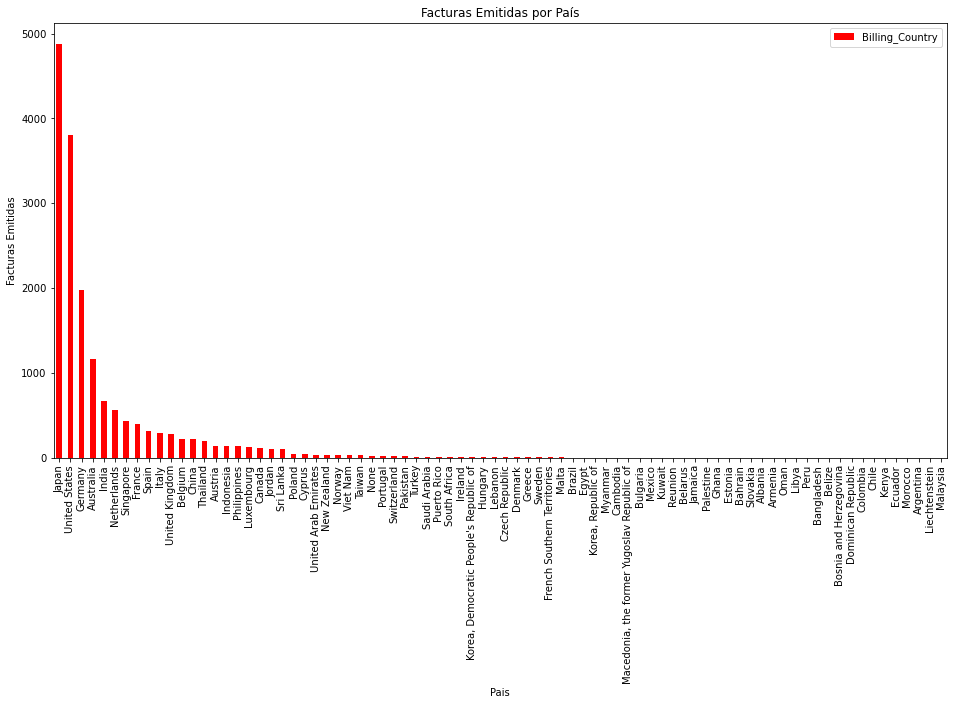

In [7]:
billing_country_df = datos['Billing_Country'].value_counts().to_frame()
billing_country_df.plot(kind='bar', figsize=(16, 8), title='Facturas Emitidas por País', color='red')

ax = plt.gca()
ax.set_ylabel('Facturas Emitidas')
ax.set_xlabel('Pais')

Text(0.5, 0, 'Pais')

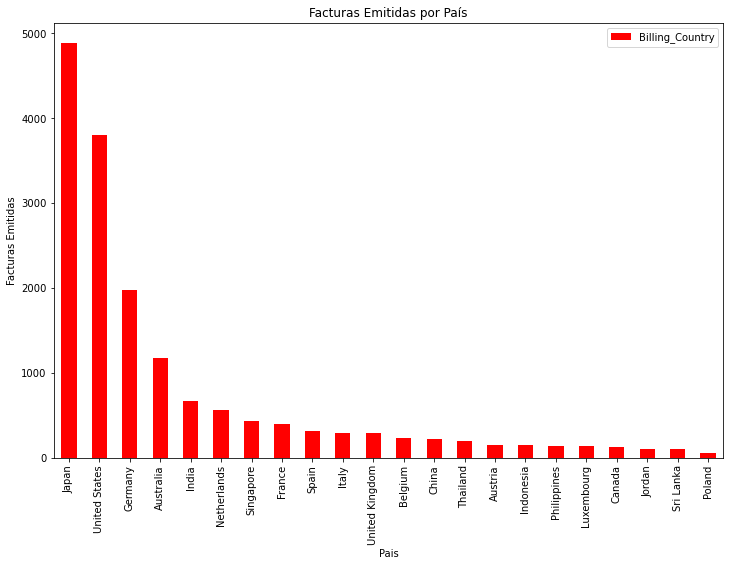

In [8]:
# Filtro por mayor a 50 facturaciones
billing_mayor_50 = billing_country_df[billing_country_df['Billing_Country']>50]
billing_mayor_50.plot(kind='bar', figsize=(12, 8), title='Facturas Emitidas por País', color='red')

ax = plt.gca()
ax.set_ylabel('Facturas Emitidas')
ax.set_xlabel('Pais')

In [9]:
### Comparo estas dos medidas

In [10]:
# Analizo unicamente los que tienen mayor a 50 apariciones
merged = billing_country_df.reset_index().merge(territory_filtered_df.reset_index(), on='index')
merged = merged.rename(columns={'index':'Country', 'Billing_Country':'Billing_Count', 'Territory':'Op_Count'})
merged = merged[(merged['Billing_Count']>50) & (merged['Op_Count']>50)].set_index('Country')
merged.head(3)

,Billing_Count,Op_Count
Country,,
Japan,4879,681
Germany,1979,1682
Australia,1169,1208


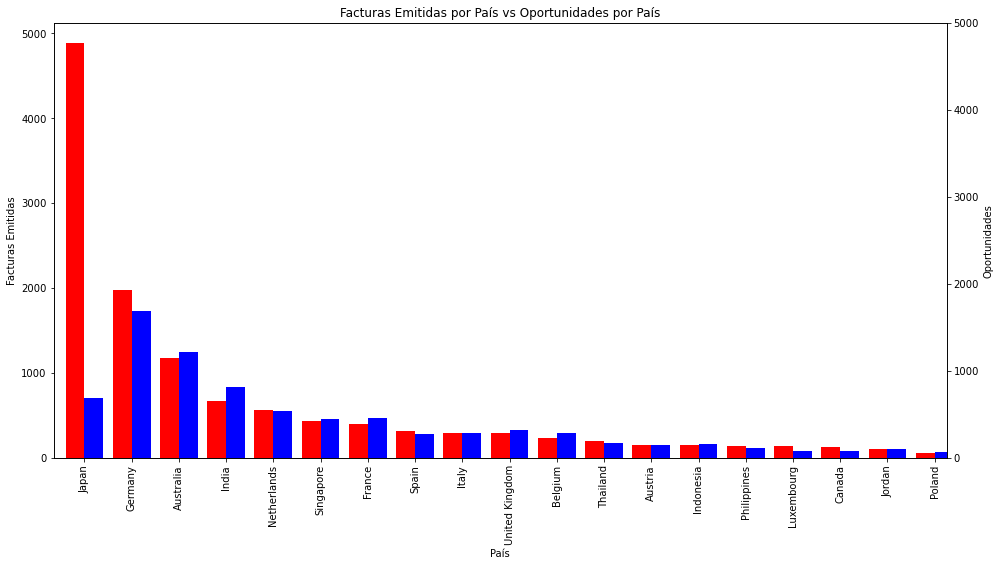

In [11]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

merged['Op_Count'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0, figsize=(16,8), title='Facturas Emitidas por País vs Oportunidades por País')
merged['Billing_Count'].plot(kind='bar', color='red', ax=ax, width=width, position=1, figsize=(16,8))

ax.set_xlabel('País')
ax.set_ylabel('Facturas Emitidas')
ax2.set_ylabel('Oportunidades')
plt.ylim([0,5000])

plt.show()

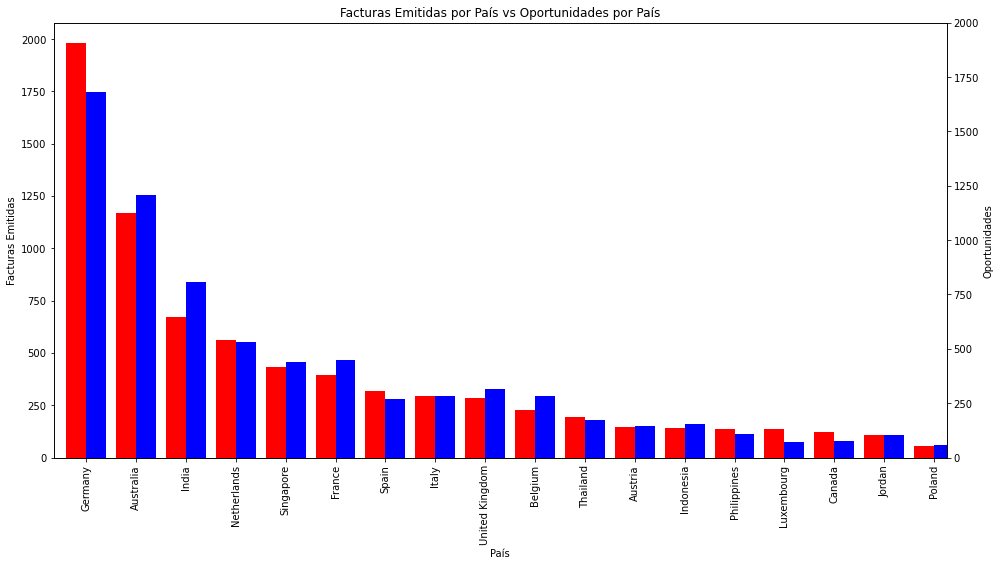

In [12]:
# Sacando a Japon, que puede estar distorcionando un poco la visualización
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

merged_no_japan = merged.drop(index='Japan')
merged_no_japan['Op_Count'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0, figsize=(16,8), title='Facturas Emitidas por País vs Oportunidades por País')
merged_no_japan['Billing_Count'].plot(kind='bar', color='red', ax=ax, width=width, position=1, figsize=(16,8))

ax.set_xlabel('País')
ax.set_ylabel('Facturas Emitidas')
ax2.set_ylabel('Oportunidades')
plt.ylim([0,2000])


plt.show()

### Promedio de aceptados según facturación por país

In [13]:
# Primero filtro aquellos que no están en estado de éxito ni fracaso
stage = datos[(datos['Stage'] == 'Closed Won') | (datos['Stage'] == 'Closed Lost')]

lost_won = stage.groupby(['Billing_Country', 'Stage']).agg({'Billing_Country':'count'}).unstack(1).fillna(0)
lost_won.columns = ['Closed Lost', 'Closed Won']
lost_won['Won Mean'] = lost_won['Closed Won'] / (lost_won['Closed Won'] + lost_won['Closed Lost'])
lost_won

,Closed Lost,Closed Won,Won Mean
Billing_Country,,,
Albania,2.00000,0.00000,0.00000
Argentina,1.00000,0.00000,0.00000
Armenia,2.00000,0.00000,0.00000
Australia,470.00000,695.00000,0.59657
Austria,23.00000,122.00000,0.84138
...,...,...,...
Turkey,10.00000,7.00000,0.41176
United Arab Emirates,33.00000,5.00000,0.13158
United Kingdom,157.00000,127.00000,0.44718


Text(0.5, 0, 'Pais')

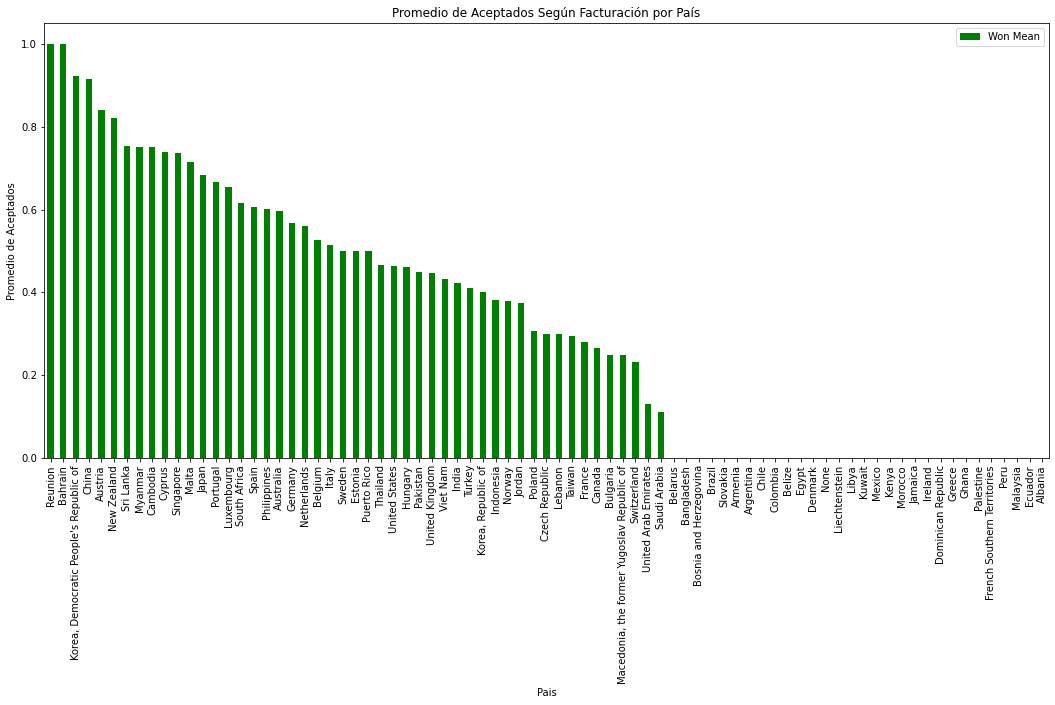

In [14]:
won_mean = lost_won['Won Mean'].sort_values(ascending=False).to_frame()
won_mean.plot(kind='bar', figsize=(18, 8), title='Promedio de Aceptados Según Facturación por País', color='green')

ax = plt.gca()
ax.set_ylabel('Promedio de Aceptados')
ax.set_xlabel('Pais')

Text(0.5, 0, 'Pais')

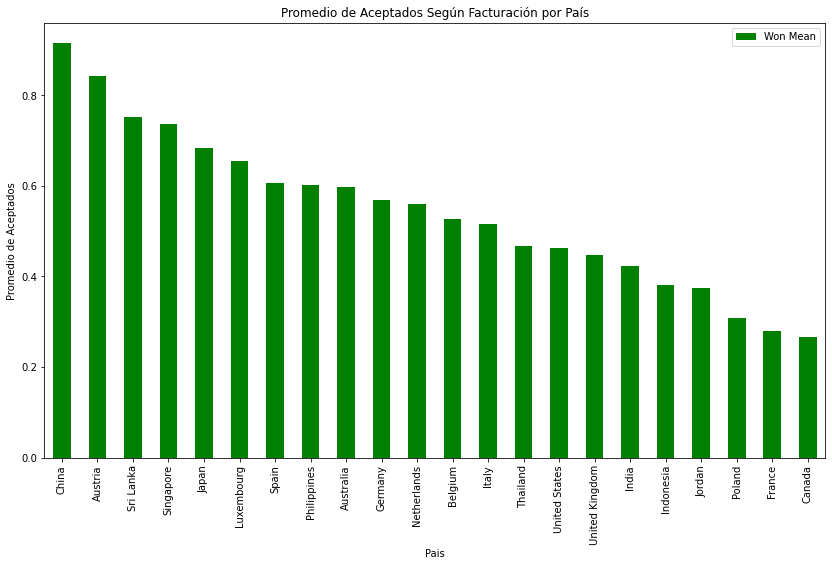

In [15]:
# Filtro para ver paises que tengan al menos 50 casos cerrados
mayor_50_cerrados = lost_won[(lost_won['Closed Lost'] + lost_won['Closed Won']) > 50]

won_mean_50 = mayor_50_cerrados['Won Mean'].sort_values(ascending=False).to_frame()
won_mean_50.plot(kind='bar', figsize=(14, 8), title='Promedio de Aceptados Según Facturación por País', color='green')

ax = plt.gca()
ax.set_ylabel('Promedio de Aceptados')
ax.set_xlabel('Pais')